# Dataset Graphs


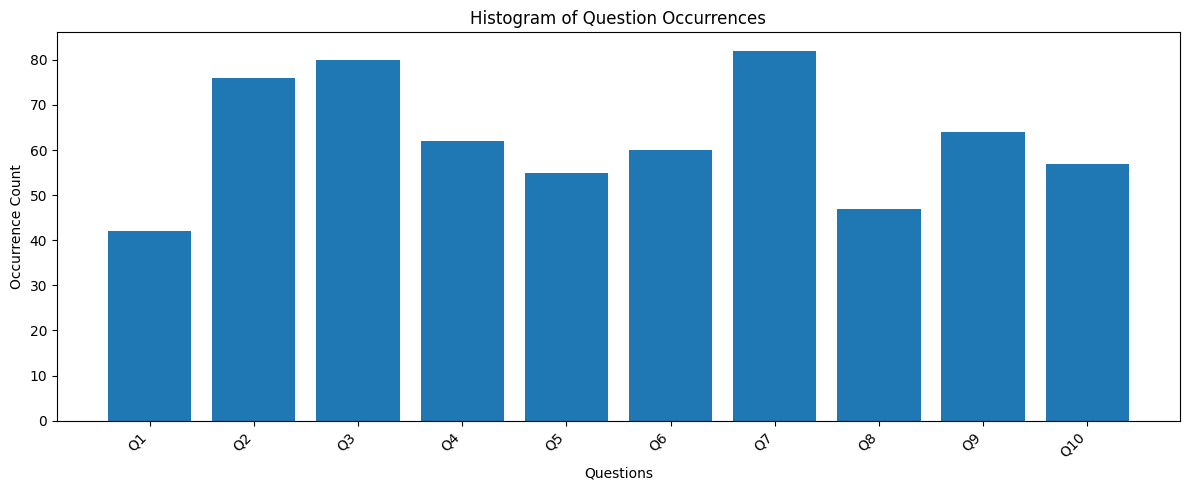

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt


# Common style settings for the plots
def set_common_style():
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Occurrence Count")
    plt.xlabel("Questions")
    plt.tight_layout()


# Load JSON data from the file
with open("parsed/SUI_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Count occurrences of each question
question_counts = Counter(item["questionText"] for item in data)

# Sort questions alphabetically
sorted_items = sorted(question_counts.items())
questions, counts = zip(*sorted_items)

# Plot the histogram
plt.figure(figsize=(12, 5))
plt.bar(
    range(len(questions)),
    counts,
    tick_label=[f"Q{i + 1}" for i in range(len(questions))],
)
plt.title("Histogram of Question Occurrences")
set_common_style()
plt.savefig("../graphs/histogram_questions_count.svg", format="svg")
plt.show()

/tmp/ipykernel_151336/3259468182.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=[f"Q{i + 1}" for i in range(len(questions))])


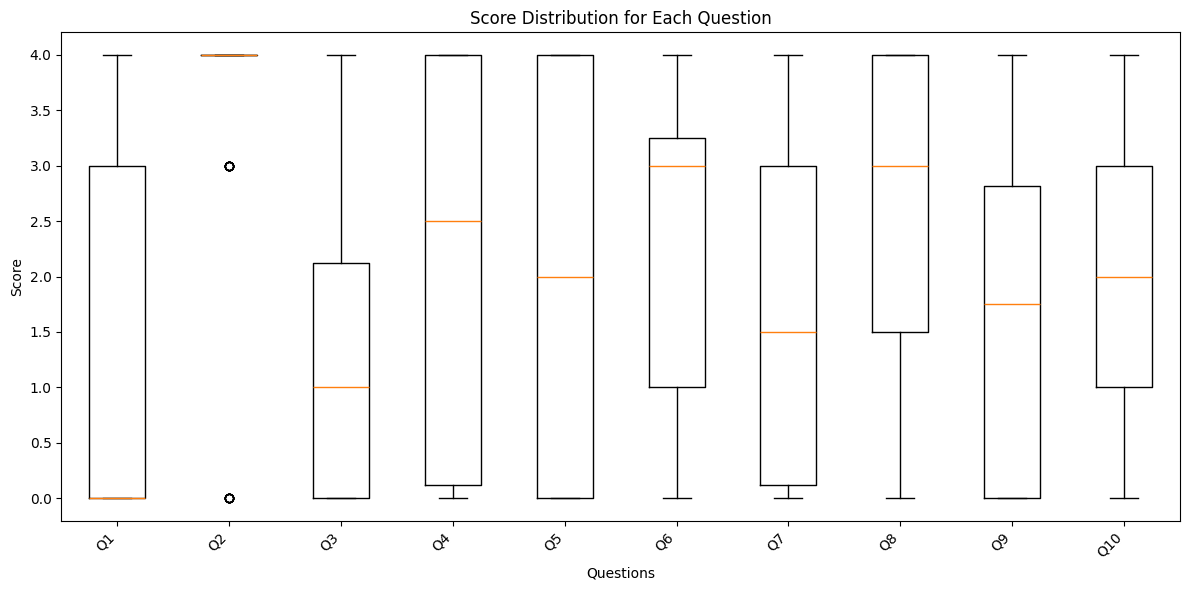

In [2]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt


# Common style settings for the plots
def set_common_style():
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Score")
    plt.xlabel("Questions")
    plt.tight_layout()


# Load data from the file
with open("parsed/SUI_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Group scores by question text
score_distribution = defaultdict(list)
for item in data:
    try:
        score = float(item["score"])
        score_distribution[item["questionText"]].append(score)
    except ValueError:
        continue  # skip records with invalid numbers

# Sort questions alphabetically
sorted_items = sorted(score_distribution.items())
questions, scores = zip(*sorted_items)

# Plot the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(scores, labels=[f"Q{i + 1}" for i in range(len(questions))])
plt.title("Score Distribution for Each Question")
set_common_style()
plt.savefig("../graphs/score_distribution.svg", format="svg")
plt.show()


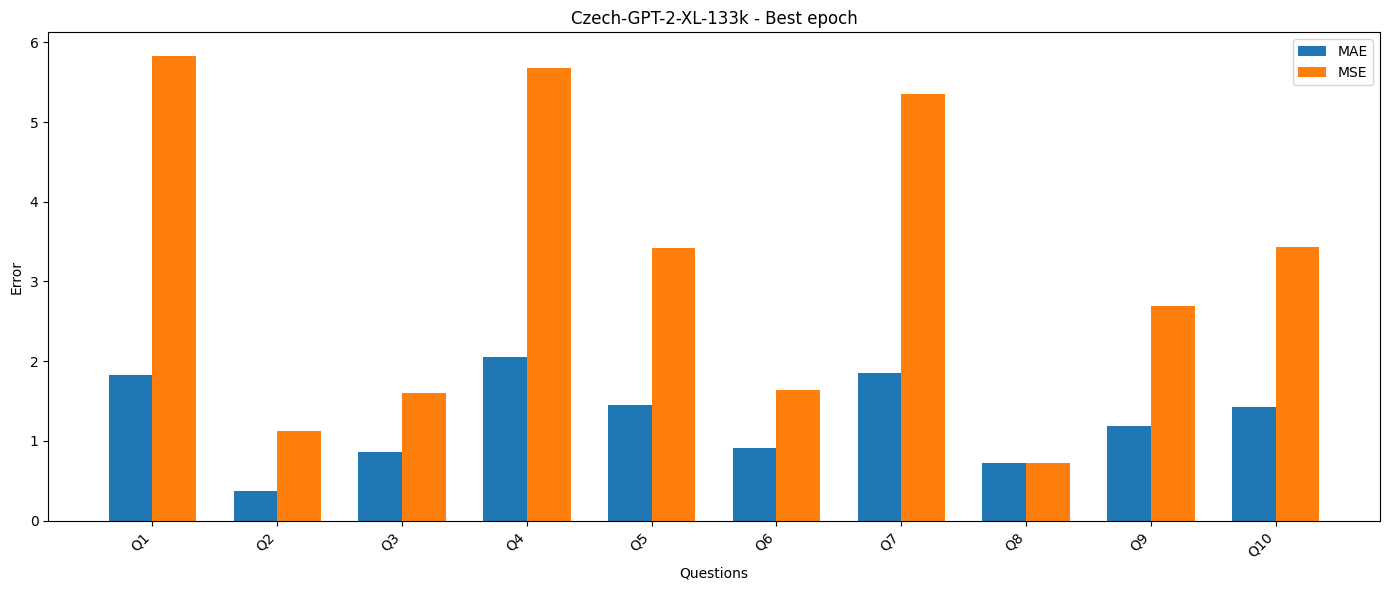

In [3]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


# Common style settings for the plots
def set_common_style():
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Error")
    plt.xlabel("Questions")
    plt.tight_layout()


# Load data
with open("inference_results.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Group errors by shortened prompt
errors_by_prompt = defaultdict(list)

for item in data:
    try:
        true = float(item["completion"])
        pred = float(item["pred"])
        prompt = item["prompt"].strip()
        key = prompt[:20]
        errors_by_prompt[key].append((true, pred))
    except ValueError:
        continue

# Calculate MAE and MSE
mae_values = {}
mse_values = {}

for prompt, pairs in errors_by_prompt.items():
    errors = [abs(t - p) for t, p in pairs]
    squared_errors = [(t - p) ** 2 for t, p in pairs]
    mae_values[prompt] = np.mean(errors)
    mse_values[prompt] = np.mean(squared_errors)

# Sort alphabetically
sorted_prompts = sorted(mae_values)
mae_sorted = [mae_values[p] for p in sorted_prompts]
mse_sorted = [mse_values[p] for p in sorted_prompts]
labels = [f"Q{i + 1}" for i in range(len(sorted_prompts))]

# Plot the combined graph
x = np.arange(len(sorted_prompts))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width / 2, mae_sorted, width, label="MAE", color="tab:blue")
plt.bar(x + width / 2, mse_sorted, width, label="MSE", color="tab:orange")

plt.xticks(x, labels, rotation=90, ha="center")
plt.title("Czech-GPT-2-XL-133k - Best epoch")
plt.legend()
set_common_style()
plt.savefig("../graphs/gtp_best_epoch.svg", format="svg")
plt.show()
